# SNA Results Analysis

Analysis of the SNA of common fandom/fics. We are attempting to find any commonalities within the most popular fandoms that came up within the social network analyses.

In [1]:
#import statements
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_json('../ao3bot/pop_fandoms_stats.json')
df.head()


,fandom,total_works,ratings,warnings,categories,fandoms,characters,relationships,freeforms
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,205105,"{'Teen And Up Audiences': '72662', 'General Au...","{'No Archive Warnings Apply': '100856', 'Creat...","{'M/M': '110358', 'F/M': '50314', 'Gen': '4070...",{'僕のヒーローアカデミア | Boku no Hero Academia | My Her...,"{'Midoriya Izuku': '105193', 'Bakugou Katsuki'...","{'Bakugou Katsuki/Midoriya Izuku': '27917', 'B...","{'Fluff': '37356', 'Angst': '26229', 'Bakugou ..."
1,Haikyuu!!,125858,"{'General Audiences': '42277', 'Teen And Up Au...","{'No Archive Warnings Apply': '76013', 'Creato...","{'M/M': '100926', 'F/M': '14863', 'Gen': '1154...","{'Haikyuu!!': '125858', '僕のヒーローアカデミア | Boku no...","{'Hinata Shouyou': '34110', 'Oikawa Tooru': '3...","{'Iwaizumi Hajime/Oikawa Tooru': '17267', 'Hin...","{'Fluff': '34155', 'Angst': '16018', 'Establis..."
2,Naruto,81515,"{'Teen And Up Audiences': '26331', 'General Au...","{'No Archive Warnings Apply': '41377', 'Creato...","{'M/M': '38025', 'F/M': '27278', 'Gen': '17835...","{'Naruto': '80881', 'Boruto: Naruto Next Gener...","{'Uzumaki Naruto': '30469', 'Hatake Kakashi': ...","{'Uchiha Sasuke/Uzumaki Naruto': '10264', 'Hat...","{'Fluff': '8646', 'Alternate Universe - Canon ..."
3,Shingeki no Kyojin | Attack on Titan,63380,"{'Teen And Up Audiences': '18055', 'Explicit':...",{'Creator Chose Not To Use Archive Warnings': ...,"{'M/M': '37177', 'F/M': '19415', 'F/F': '6910'...",{'Shingeki no Kyojin | Attack on Titan': '6319...,"{'Levi Ackerman': '35915', 'Eren Yeager': '335...","{'Levi Ackerman/Eren Yeager': '15780', 'Levi A...",{'Alternate Universe - Modern Setting': '11022...
4,Miraculous Ladybug,48526,"{'General Audiences': '21597', 'Teen And Up Au...","{'No Archive Warnings Apply': '30296', 'Creato...","{'F/M': '33408', 'Gen': '8446', 'F/F': '4124',...","{'Miraculous Ladybug': '48526', 'Batman - All ...","{'Marinette Dupain-Cheng | Ladybug': '40087', ...",{'Adrien Agreste | Chat Noir/Marinette Dupain-...,"{'Fluff': '10478', 'Identity Reveal': '6393', ..."


The fandoms that came up the most during the SNAs were:

- Marvel/MCU and subtypes like Avengers/Captain America
- My Hero Academia
- RPF
- BTS
- Harry Potter
- Minecraft

In [3]:
top_fandoms = df[df["fandom"].isin(
    ["Marvel", 
     "僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia", 
     "Real Person Fiction", 
     "방탄소년단 | Bangtan Boys | BTS", 
     "Harry Potter - J. K. Rowling", 
     "Minecraft (Video Game)"])]
top_fandoms
top_fandoms["fandom"] == top_fandoms["fandom"].replace(to_replace = "僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia", value = "My Hero Academia", inplace = True)
top_fandoms["fandom"] == top_fandoms["fandom"].replace(to_replace = "방탄소년단 | Bangtan Boys | BTS", value = "BTS", inplace = True)

/Users/emilymedema/opt/miniconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0     False
5     False
10    False
14    False
18    False
21    False
Name: fandom, dtype: bool

Now that we have the most popular fandoms according to the SNAs. Let's compare across all of them based on `Total_Works`, `Ratings`, `Warnings`, `Categories`, `Fandoms`, `Characters`, `Relationships`, and `Freeform` tags.

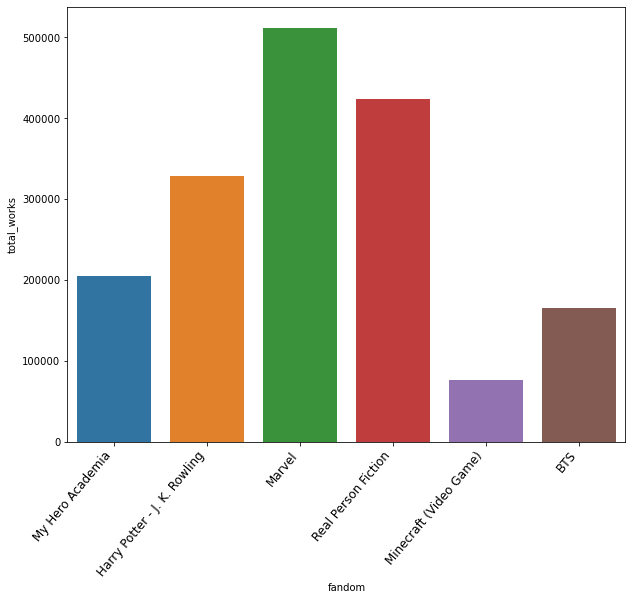

In [4]:
#define data
fandoms = top_fandoms["fandom"]
total_works = top_fandoms["total_works"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:35]

plt.figure(figsize=(10,8))

ax = sns.barplot(x="fandom", y="total_works", data=top_fandoms)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

Let's take a look at ratings across the fandoms.

In [5]:
temp_ratings = top_fandoms["ratings"].tolist()
fandoms = top_fandoms["fandom"].tolist()

for i in range(len(temp_ratings)):
    temp_ratings[i]["Fandom"] = fandoms[i]

temp = []
for i in range(len(temp_ratings)):
    fandom = temp_ratings[i]["Fandom"]
    teen = temp_ratings[i]["Teen And Up Audiences"]
    general = temp_ratings[i]["General Audiences"]
    explicit = temp_ratings[i]["Explicit"]
    mature = temp_ratings[i]["Mature"]
    notrated = temp_ratings[i]["Not Rated"]
    temp.append({"Fandom":fandom, "Rating": "Teen", "Count": teen})
    temp.append({"Fandom":fandom, "Rating": "General", "Count": general})
    temp.append({"Fandom":fandom, "Rating": "Explicit", "Count": explicit})
    temp.append({"Fandom":fandom, "Rating": "Mature", "Count": mature})
    temp.append({"Fandom":fandom, "Rating": "NotRated", "Count": notrated})
ratings = pd.DataFrame(temp)
ratings.head()
ratings['Count'] = pd.to_numeric(ratings['Count'])

#Normalize data
#standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
ratings_nums = ratings[["Count"]]
ratings[["Count"]] = (ratings_nums-ratings_nums.min())/(ratings_nums.max()-ratings_nums.min())
ratings

,Fandom,Rating,Count
0,My Hero Academia,Teen,0.428670
1,My Hero Academia,General,0.262710
2,My Hero Academia,Explicit,0.200279
3,My Hero Academia,Mature,0.143998
4,My Hero Academia,NotRated,0.113838
5,Harry Potter - J. K. Rowling,Teen,0.606723
6,Harry Potter - J. K. Rowling,General,0.541861
7,Harry Potter - J. K. Rowling,Explicit,0.312810
8,Harry Potter - J. K. Rowling,Mature,0.319186
9,Harry Potter - J. K. Rowling,NotRated,0.148464


<Figure size 1440x1440 with 0 Axes>

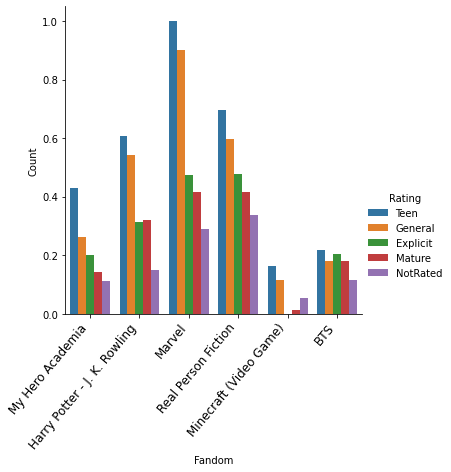

In [6]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:35]

plt.figure(figsize=(20,20))

sns.catplot(x="Fandom", y="Count", hue="Rating", kind="bar", data=ratings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

As we can see, the most popular rating by far is Teen. 

Let's look and see if there is commonality in Warnings.

In [7]:
temp_warning = top_fandoms["warnings"].tolist()
for i in range(len(temp_warning)):
    temp_warning[i]["Fandom"] = fandoms[i]

temp = []
for i in range(len(temp_warning)):
    fandom = temp_warning[i]["Fandom"]
    nowarnings = temp_warning[i]["No Archive Warnings Apply"]
    notused = temp_warning[i]["Creator Chose Not To Use Archive Warnings"]
    violence = temp_warning[i]["Graphic Depictions Of Violence"]
    mcd = temp_warning[i]["Major Character Death"]
    underage = temp_warning[i]["Underage"]
    noncon = temp_warning[i]["Rape/Non-Con"]
    temp.append({"Fandom":fandom, "Warning": "NoWarningsApply", "Count": nowarnings})
    temp.append({"Fandom":fandom, "Warning": "NotUsed", "Count": notused})
    temp.append({"Fandom":fandom, "Warning": "Violence", "Count": violence})
    temp.append({"Fandom":fandom, "Warning": "MCD", "Count": mcd})
    temp.append({"Fandom":fandom, "Warning": "Underage", "Count": underage})
    temp.append({"Fandom":fandom, "Warning": "Rape/Non-Con", "Count": noncon})
warnings = pd.DataFrame(temp)
warnings['Count'] = pd.to_numeric(warnings['Count'])

#Normalize data
#standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
warnings_nums = warnings[["Count"]]
warnings[["Count"]] = (warnings_nums-warnings_nums.min())/(warnings_nums.max()-warnings_nums.min())
warnings.head()

,Fandom,Warning,Count
0,My Hero Academia,NoWarningsApply,0.331697
1,My Hero Academia,NotUsed,0.241529
2,My Hero Academia,Violence,0.080398
3,My Hero Academia,MCD,0.042777
4,My Hero Academia,Underage,0.026870


<Figure size 1440x1440 with 0 Axes>

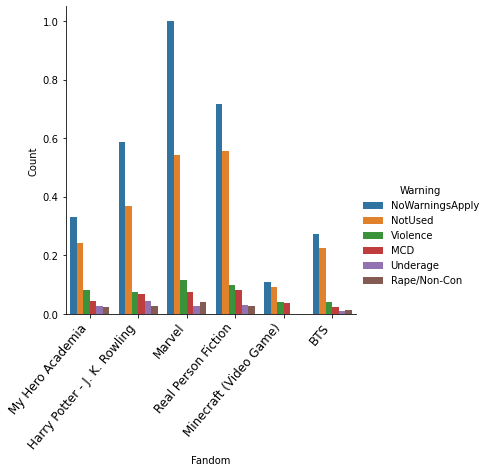

In [8]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:35]

plt.figure(figsize=(20,20))

sns.catplot(x="Fandom", y="Count", hue="Warning", kind="bar", data=warnings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

Evidently, the most popular warnings are the "No Warnings Apply", followed by "Not Used"

Let's look at the categories and see if there are commonalities.

In [9]:
temp_cat = top_fandoms["categories"].tolist()
for i in range(len(temp_warning)):
    temp_cat[i]["Fandom"] = fandoms[i]

temp = []
for i in range(len(temp_cat)):
    fandom = temp_cat[i]["Fandom"]
    mm = temp_cat[i]["M/M"]
    fm = temp_cat[i]["F/M"]
    gen = temp_cat[i]["Gen"]
    multi = temp_cat[i]["Multi"]
    ff = temp_cat[i]["F/F"]
    other = temp_cat[i]["Other"]
    temp.append({"Fandom":fandom, "Category": "M/M", "Count": mm})
    temp.append({"Fandom":fandom, "Category": "F/M", "Count": fm})
    temp.append({"Fandom":fandom, "Category": "Gen", "Count": gen})
    temp.append({"Fandom":fandom, "Category": "Multi", "Count": multi})
    temp.append({"Fandom":fandom, "Category": "F/F", "Count": ff})
    temp.append({"Fandom":fandom, "Category": "Other", "Count": other})
cats = pd.DataFrame(temp)
cats['Count'] = pd.to_numeric(cats['Count'])

#Normalize data
#standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
cats_nums = cats[["Count"]]
cats[["Count"]] = (cats_nums-cats_nums.min())/(cats_nums.max()-cats_nums.min())
cats.head()

,Fandom,Category,Count
0,My Hero Academia,M/M,0.409598
1,My Hero Academia,F/M,0.183732
2,My Hero Academia,Gen,0.147578
3,My Hero Academia,Multi,0.059085
4,My Hero Academia,F/F,0.048958


<Figure size 1440x1440 with 0 Axes>

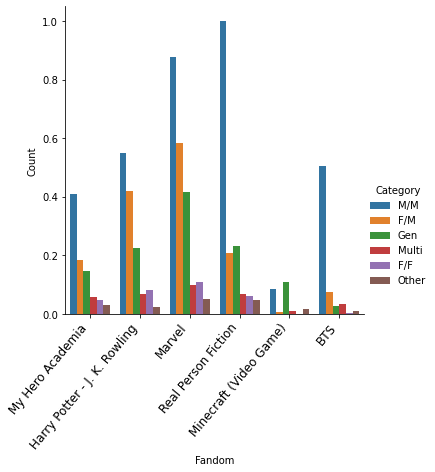

In [10]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:35]

plt.figure(figsize=(20,20))

sns.catplot(x="Fandom", y="Count", hue="Category", kind="bar", data=cats)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

Clearly, M/M relationships are the most popular. This could be due to a variety of factors. Historically speaking, M/M ships are the most popular. This was due popular shows and fandoms not having a lot of interesting or developed relationships or female characters. 

Additionally, within Fandom is a place that has been developed to have representation queer people might not see on screen in traditional media. Likewise, while there is a lack of canon queer representation there is a surplus of developed male friendships that verge onto romantic quite a bit not to mention the intentional queerbaiting media companies advertise now.

Now let's take a look at the Fandoms that are common within all these popular fandoms.

In [11]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular fandoms crossed over with the fandoms that we scraped within our dataframe.
We are going to iterate through the fandoms we have and add each fandom into a new dictionary with a count beside it.
'''
crossover_count = {}
for i in range(len(top_fandoms["fandom"])):
    temp = top_fandoms["fandoms"].tolist()[i]
    keys = temp.keys()
    for j in keys:
        if j in crossover_count:
            crossover_count[j] += 1
        else:
            if j == df["fandom"][i]:
                crossover_count[j] = 0
            else:
                crossover_count[j] = 1

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
crossovers = pd.DataFrame(list(crossover_count.items()), columns = ["fandom", "count"])
crossovers.head()

,fandom,count
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,1
1,Naruto,2
2,Haikyuu!!,1
3,Harry Potter - J. K. Rowling,3
4,Shingeki no Kyojin | Attack on Titan,1


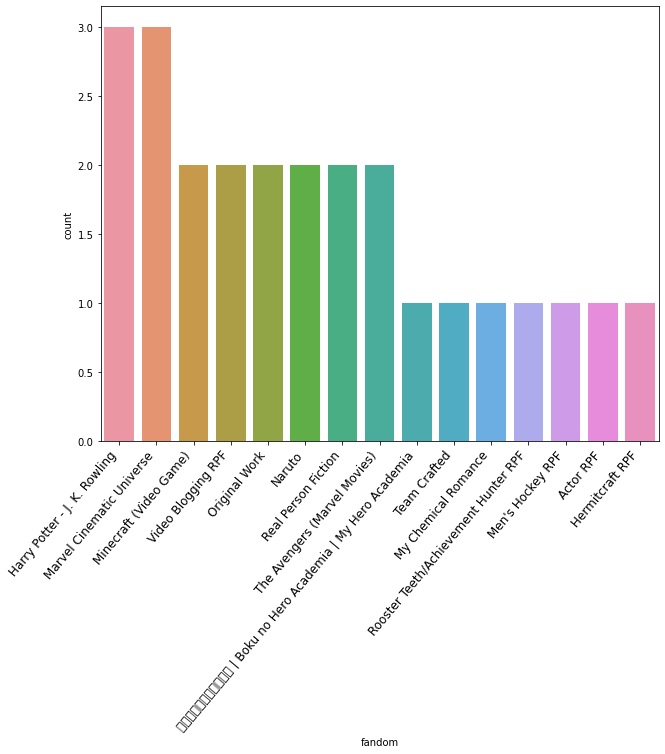

In [12]:
#Now that we have the data in a format we can work with, lets plot this data
#Since there is no way for us to make sense of the data when we use all 220 rows, we will subsect it to be the top 15.
#create bar chart for crossovers
crossovers_sorted = crossovers.sort_values('count', ascending = False)
crossovers_subset = crossovers_sorted[:15]
plt.figure(figsize=(10,8))

ax = sns.barplot(x="fandom", y="count", data=crossovers_subset)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

In [13]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular freeform tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each tag into a new dictionary with a count beside it.
'''
tag_count = {}
for i in range(len(top_fandoms["freeforms"])):
    temp = top_fandoms["freeforms"].tolist()[i]
    keys = temp.keys()
    for j in keys:
        if j in tag_count:
            tag_count[j] += 1
        else:
            tag_count[j] = 1

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
tags = pd.DataFrame(list(tag_count.items()), columns = ["tag", "count"])
tags.head()

,tag,count
0,Fluff,6
1,Angst,6
2,Bakugou Katsuki Swears A Lot,1
3,Hurt/Comfort,5
4,Bakugou Katsuki is Bad at Feelings,1


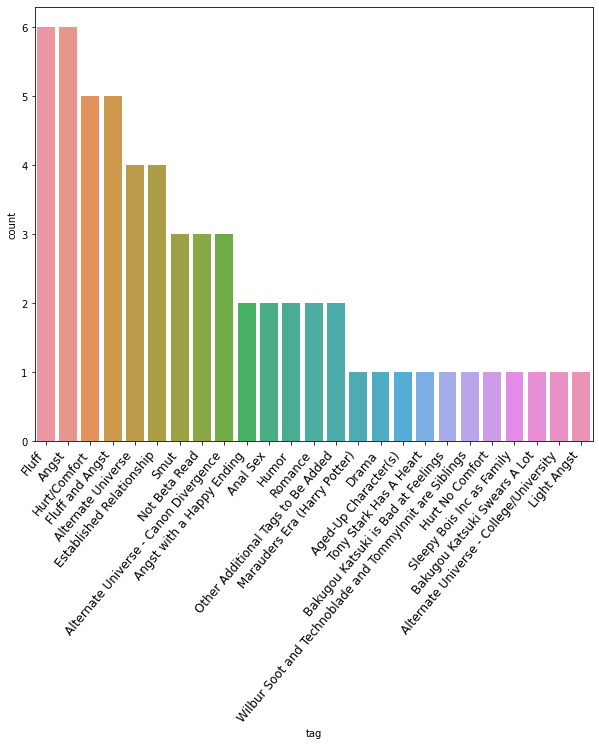

In [14]:
#Now that we have the data in a format we can work with, lets plot this data
#Since there is no way for us to make sense of the data when we use all 81 rows, we will subsect it to be the top 15.
#create bar chart for crossovers
tags_sorted = tags.sort_values('count', ascending = False)
#tags_subset = tags_sorted[:15]
plt.figure(figsize=(10,8))

ax = sns.barplot(x="tag", y="count", data=tags_sorted)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

Let's see if there are any crossover characters between these popular fandoms as well as take a look at what type of characters are popular.

In [15]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''
character_count = {}
for i in range(len(top_fandoms["characters"])):
    temp = top_fandoms["characters"].tolist()[i]
    keys = temp.keys()
    for j in keys:
        if j in character_count:
            character_count[j] += 1
        else:
            character_count[j] = 1

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(list(character_count.items()), columns = ["character", "count"])
characters.head()

,character,count
0,Midoriya Izuku,1
1,Bakugou Katsuki,1
2,Todoroki Shouto,1
3,Kirishima Eijirou,1
4,Aizawa Shouta | Eraserhead,1


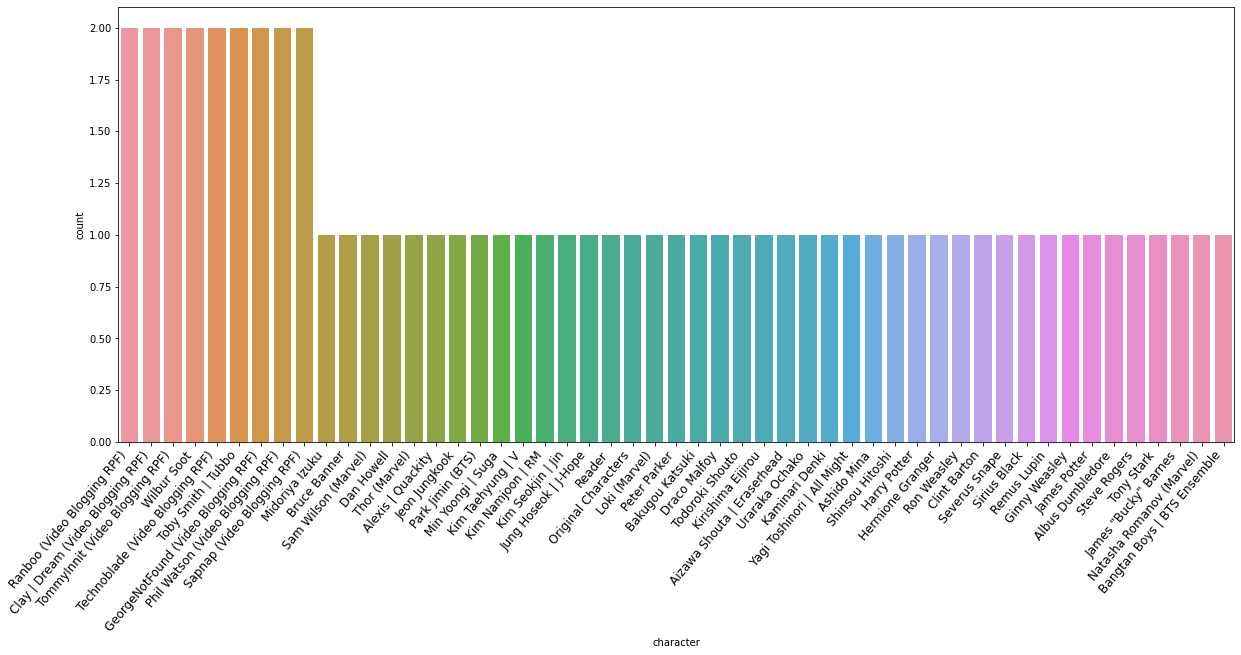

In [16]:
#Now that we have the data in a format we can work with, lets plot this data
#Since there is no way for us to make sense of the data when we use all 283 rows, we will subsect it to be every character that has more than one instance.
#create bar chart for crossovers
characters_sorted = characters.sort_values('count', ascending = False)
plt.figure(figsize=(20,8))

ax = sns.barplot(x="character", y="count", data=characters_sorted)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

Let's look at the characters and relationships on a per fandom basis.

### My Hero Academia

First, let's look at the character distribution.

In [17]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''

mha = top_fandoms[top_fandoms["fandom"] == "My Hero Academia"]
mha_characters = mha["characters"].tolist()
temp = []
for i in range(len(mha_characters)):
    for key in list(mha_characters[i].keys()):
        temp.append({"Character": key, "Count": mha_characters[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(temp)
characters['Count'] = pd.to_numeric(characters['Count'])
#Don't need to normalize since this is within the fandom
# chars_nums = characters[["Count"]]
# characters[["Count"]] = (chars_nums-chars_nums.min())/(chars_nums.max()-chars_nums.min())
characters

,Character,Count
0,Midoriya Izuku,105193
1,Bakugou Katsuki,99012
2,Todoroki Shouto,59867
3,Kirishima Eijirou,54161
4,Aizawa Shouta | Eraserhead,52525
5,Uraraka Ochako,40362
6,Kaminari Denki,38629
7,Yagi Toshinori | All Might,33428
8,Ashido Mina,28158
9,Shinsou Hitoshi,28127


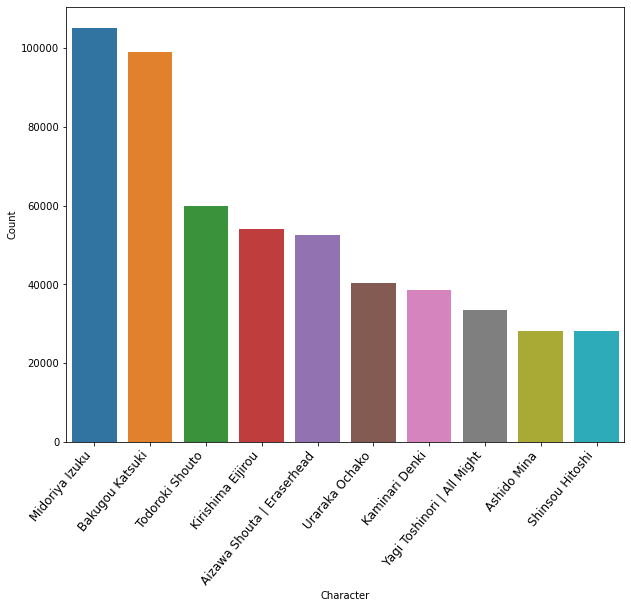

In [18]:
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Character", y="Count", data=characters)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

In [19]:
mha_ships = mha["relationships"].tolist()
temp = []
for i in range(len(mha_ships)):
    for key in list(mha_ships[i].keys()):
        temp.append({"Relationship": key, "Count": mha_ships[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
# ships_nums = ships[["Count"]]
# ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
ships

,Relationship,Count
0,Bakugou Katsuki/Midoriya Izuku,27917
1,Bakugou Katsuki/Kirishima Eijirou,24461
2,Midoriya Izuku/Todoroki Shouto,19880
3,Aizawa Shouta | Eraserhead/Yamada Hizashi | Pr...,14274
4,Bakugou Katsuki & Midoriya Izuku,10658
5,Bakugou Katsuki/Todoroki Shouto,8108
6,Dabi | Todoroki Touya/Takami Keigo | Hawks,6935
7,Midoriya Izuku/Uraraka Ochako,6641
8,Aizawa Shouta | Eraserhead & Midoriya Izuku,6520
9,Kaminari Denki/Shinsou Hitoshi,6280


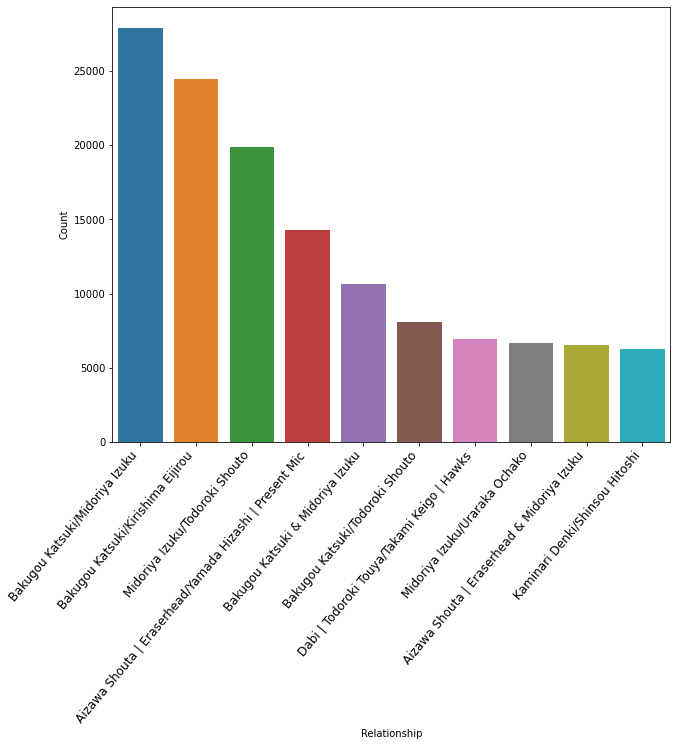

In [20]:
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Harry Potter

Let's do the same with Harry Potter

In [21]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''

hp = top_fandoms[top_fandoms["fandom"] == "Harry Potter - J. K. Rowling"]
hp_characters = hp["characters"].tolist()
temp = []
for i in range(len(hp_characters)):
    for key in list(hp_characters[i].keys()):
        temp.append({"Character": key, "Count": hp_characters[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(temp)
characters['Count'] = pd.to_numeric(characters['Count'])
# chars_nums = characters[["Count"]]
# characters[["Count"]] = (chars_nums-chars_nums.min())/(chars_nums.max()-chars_nums.min())
characters

,Character,Count
0,Harry Potter,141636
1,Hermione Granger,91755
2,Draco Malfoy,89335
3,Ron Weasley,61007
4,Severus Snape,55084
5,Sirius Black,54374
6,Remus Lupin,51212
7,Ginny Weasley,36695
8,James Potter,33770
9,Albus Dumbledore,29933


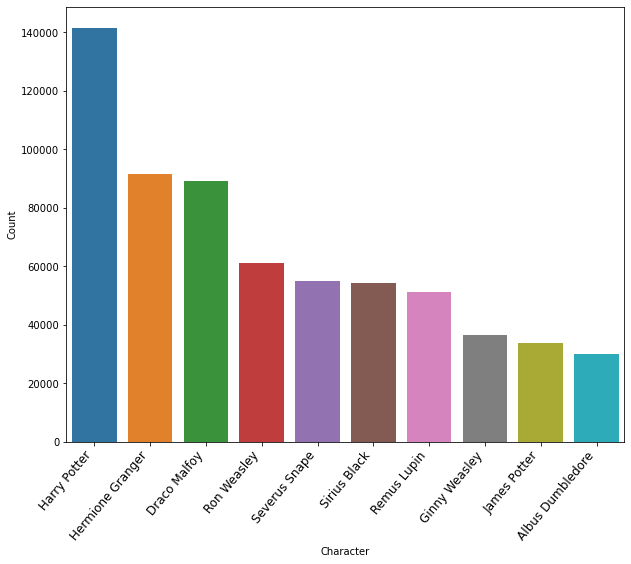

In [22]:
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Character", y="Count", data=characters)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

                     Relationship  Count
0       Draco Malfoy/Harry Potter  51611
1        Sirius Black/Remus Lupin  26883
2  James Potter/Lily Evans Potter  16711
3   Hermione Granger/Draco Malfoy  16533
4    Hermione Granger/Ron Weasley  15674
5      Harry Potter/Severus Snape  13440
6      Harry Potter/Ginny Weasley  12686
7  Hermione Granger/Severus Snape   5789
8         Harry Potter/Tom Riddle   5577
9   Hermione Granger/Harry Potter   4943


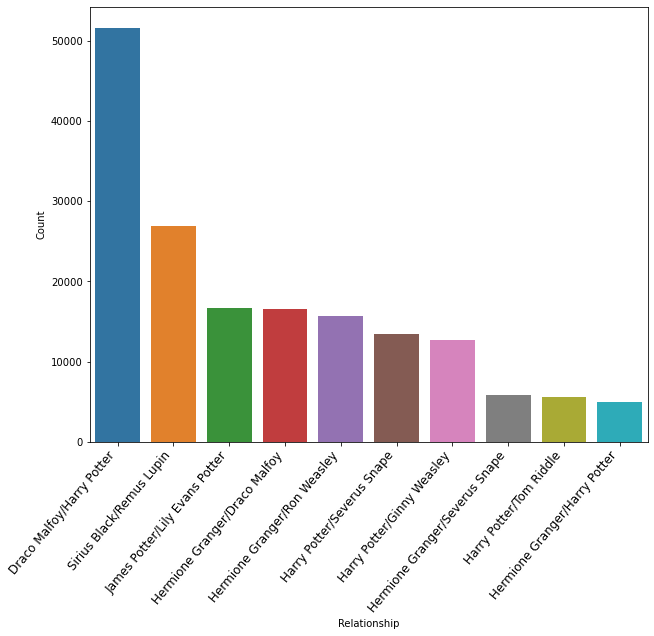

In [23]:
hp_ships = hp["relationships"].tolist()
temp = []
for i in range(len(hp_ships)):
    for key in list(hp_ships[i].keys()):
        temp.append({"Relationship": key, "Count": hp_ships[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
# ships_nums = ships[["Count"]]
# ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
print(ships)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Marvel

Let's try this with Marvel.

                  Character   Count
0              Steve Rogers  180332
1                Tony Stark  176501
2      James "Bucky" Barnes  130065
3  Natasha Romanov (Marvel)  111158
4              Clint Barton   91967
5              Peter Parker   75307
6             Thor (Marvel)   64907
7             Loki (Marvel)   61915
8              Bruce Banner   59416
9       Sam Wilson (Marvel)   53486


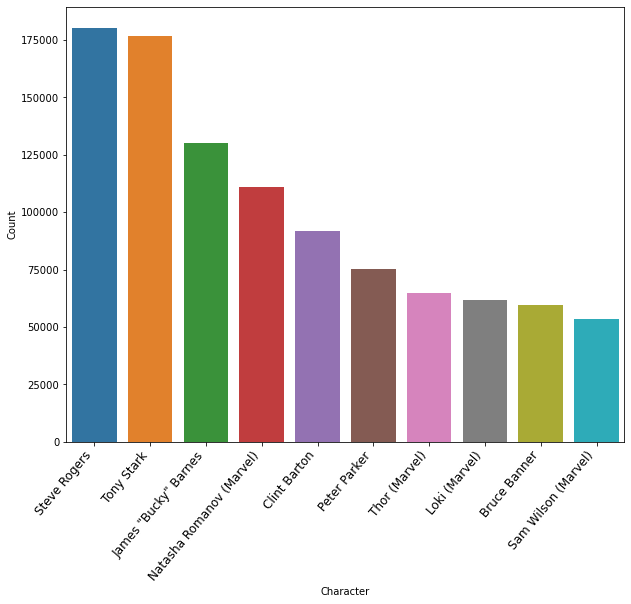

In [24]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''

marvel = top_fandoms[top_fandoms["fandom"] == "Marvel"]
marvel_characters = marvel["characters"].tolist()
temp = []
for i in range(len(marvel_characters)):
    for key in list(marvel_characters[i].keys()):
        temp.append({"Character": key, "Count": marvel_characters[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(temp)
characters['Count'] = pd.to_numeric(characters['Count'])
# chars_nums = characters[["Count"]]
# characters[["Count"]] = (chars_nums-chars_nums.min())/(chars_nums.max()-chars_nums.min())
print(characters)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Character", y="Count", data=characters)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

                          Relationship  Count
0    James "Bucky" Barnes/Steve Rogers  56362
1              Steve Rogers/Tony Stark  39149
2            Peter Parker & Tony Stark  23186
3              Pepper Potts/Tony Stark  19820
4        Erik Lehnsherr/Charles Xavier  15766
5                   Loki/Thor (Marvel)  13510
6          James "Bucky" Barnes/Reader  11590
7         Clint Barton/Natasha Romanov  11476
8  James "Bucky" Barnes & Steve Rogers  10921
9                      Loki/Tony Stark  10848


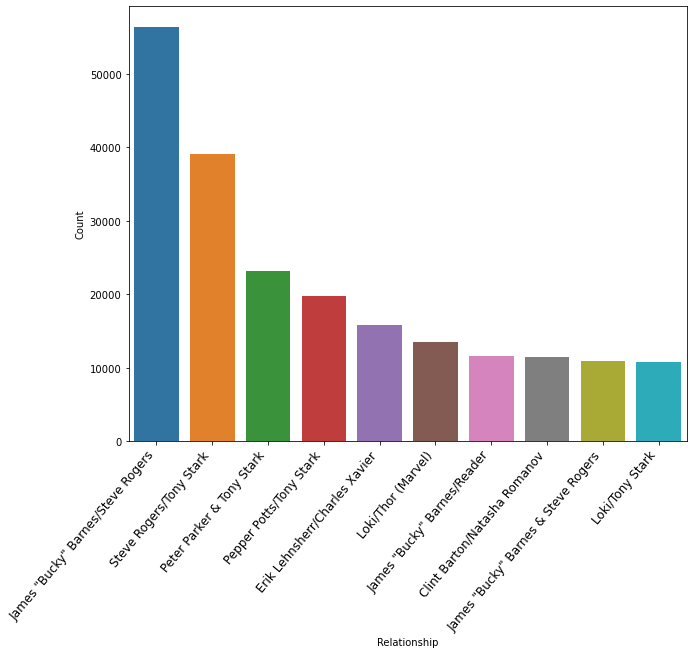

In [25]:
marvel_ships = marvel["relationships"].tolist()
temp = []
for i in range(len(marvel_ships)):
    for key in list(marvel_ships[i].keys()):
        temp.append({"Relationship": key, "Count": marvel_ships[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
# ships_nums = ships[["Count"]]
# ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
print(ships)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Real Person Fiction

Let's take a look for common factors in Real Person Fiction.

                             Character  Count
0    Clay | Dream (Video Blogging RPF)  39034
1      TommyInnit (Video Blogging RPF)  36958
2                          Wilbur Soot  32478
3     Technoblade (Video Blogging RPF)  29554
4                   Toby Smith | Tubbo  26926
5  GeorgeNotFound (Video Blogging RPF)  25641
6     Phil Watson (Video Blogging RPF)  25355
7          Sapnap (Video Blogging RPF)  23126
8          Ranboo (Video Blogging RPF)  19299
9                           Dan Howell  15899


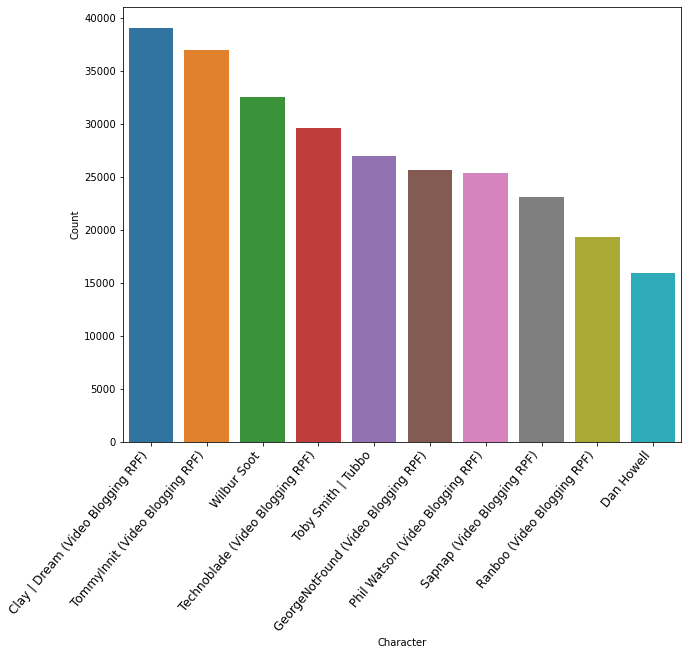

In [26]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''

rpf = top_fandoms[top_fandoms["fandom"] == "Real Person Fiction"]
rpf_characters = rpf["characters"].tolist()
temp = []
for i in range(len(rpf_characters)):
    for key in list(rpf_characters[i].keys()):
        temp.append({"Character": key, "Count": rpf_characters[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(temp)
characters['Count'] = pd.to_numeric(characters['Count'])
# chars_nums = characters[["Count"]]
# characters[["Count"]] = (chars_nums-chars_nums.min())/(chars_nums.max()-chars_nums.min())
print(characters)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Character", y="Count", data=characters)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

                                        Relationship  Count
0                             Dan Howell/Phil Lester  17392
1   Clay | Dream/GeorgeNotFound (Video Blogging RPF)  14623
2                      Jensen Ackles/Jared Padalecki  13573
3                              Frank Iero/Gerard Way  10407
4                        No Romantic Relationship(s)   9057
5  Wilbur Soot & Technoblade & TommyInnit & Phil ...   8545
6                    Toby Smith | Tubbo & TommyInnit   7752
7                           Wilbur Soot & TommyInnit   7740
8                           Patrick Stump/Pete Wentz   5908
9                        Wang Yi Bo/Xiao Zhan | Sean   5694


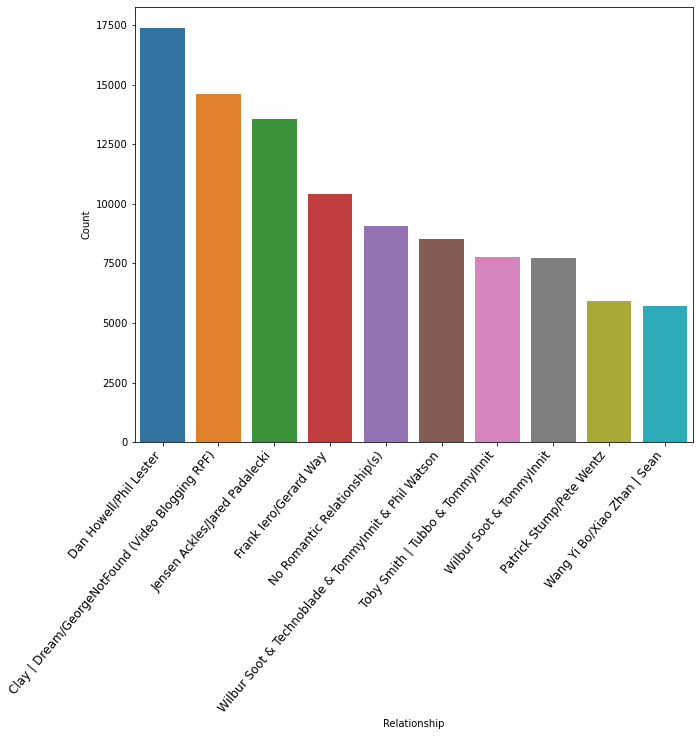

In [27]:
rpf_ships = rpf["relationships"].tolist()
temp = []
for i in range(len(rpf_ships)):
    for key in list(rpf_ships[i].keys()):
        temp.append({"Relationship": key, "Count": rpf_ships[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
# ships_nums = ships[["Count"]]
# ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
print(ships)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Minecraft (Video Game)

Let's take a look at minecraft now.

                             Character  Count
0      TommyInnit (Video Blogging RPF)  36930
1    Clay | Dream (Video Blogging RPF)  36025
2                          Wilbur Soot  31654
3     Technoblade (Video Blogging RPF)  30040
4                   Toby Smith | Tubbo  27223
5     Phil Watson (Video Blogging RPF)  25543
6  GeorgeNotFound (Video Blogging RPF)  22478
7          Sapnap (Video Blogging RPF)  21011
8          Ranboo (Video Blogging RPF)  19965
9                    Alexis | Quackity  14433


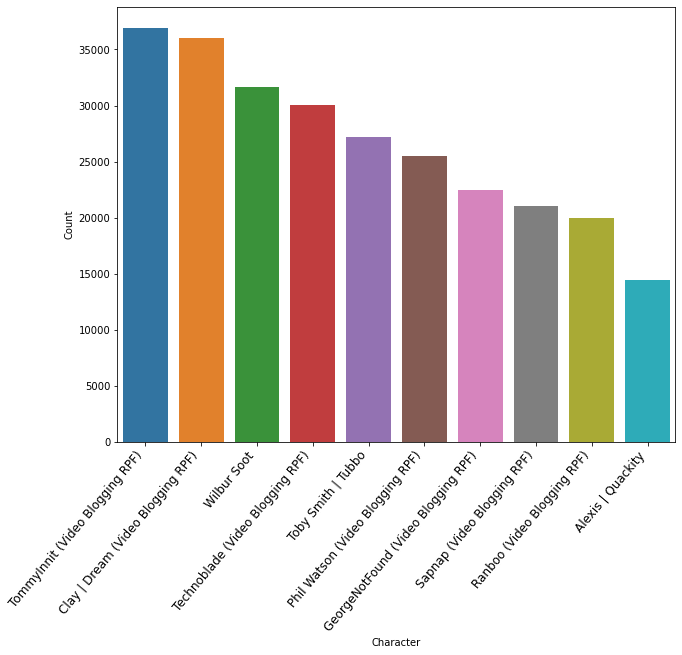

In [28]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''

minecraft = top_fandoms[top_fandoms["fandom"] == "Minecraft (Video Game)"]
minecraft_characters = minecraft["characters"].tolist()
temp = []
for i in range(len(minecraft_characters)):
    for key in list(minecraft_characters[i].keys()):
        temp.append({"Character": key, "Count": minecraft_characters[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(temp)
characters['Count'] = pd.to_numeric(characters['Count'])
# chars_nums = characters[["Count"]]
# characters[["Count"]] = (chars_nums-chars_nums.min())/(chars_nums.max()-chars_nums.min())
print(characters)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Character", y="Count", data=characters)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

                                        Relationship  Count
0   Clay | Dream/GeorgeNotFound (Video Blogging RPF)  11827
1  Wilbur Soot & Technoblade & TommyInnit & Phil ...   8396
2                        No Romantic Relationship(s)   7913
3                    Toby Smith | Tubbo & TommyInnit   7336
4                           Wilbur Soot & TommyInnit   7234
5      Technoblade & TommyInnit (Video Blogging RPF)   5226
6                        Ranboo & Toby Smith | Tubbo   4611
7     Technoblade & Phil Watson (Video Blogging RPF)   3615
8  Clay | Dream & GeorgeNotFound & Sapnap (Video ...   3329
9           Ranboo & TommyInnit (Video Blogging RPF)   3155


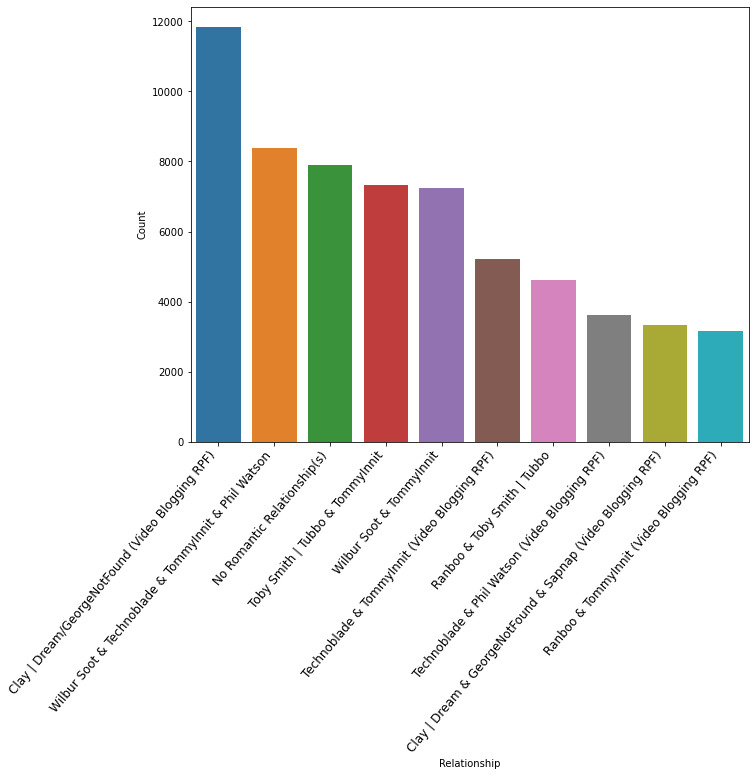

In [29]:
minecraft_ships = minecraft["relationships"].tolist()
temp = []
for i in range(len(minecraft_ships)):
    for key in list(minecraft_ships[i].keys()):
        temp.append({"Relationship": key, "Count": minecraft_ships[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
# ships_nums = ships[["Count"]]
# ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
print(ships)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### BTS

Lastly let's take a look at the BTS fandom.

                     Character   Count
0                Jeon Jungkook  105968
1             Park Jimin (BTS)  102138
2            Min Yoongi | Suga  100335
3             Kim Taehyung | V   98914
4             Kim Namjoon | RM   84913
5            Kim Seokjin | Jin   81795
6         Jung Hoseok | J-Hope   80332
7                       Reader    8244
8          Original Characters    5690
9  Bangtan Boys | BTS Ensemble    5515


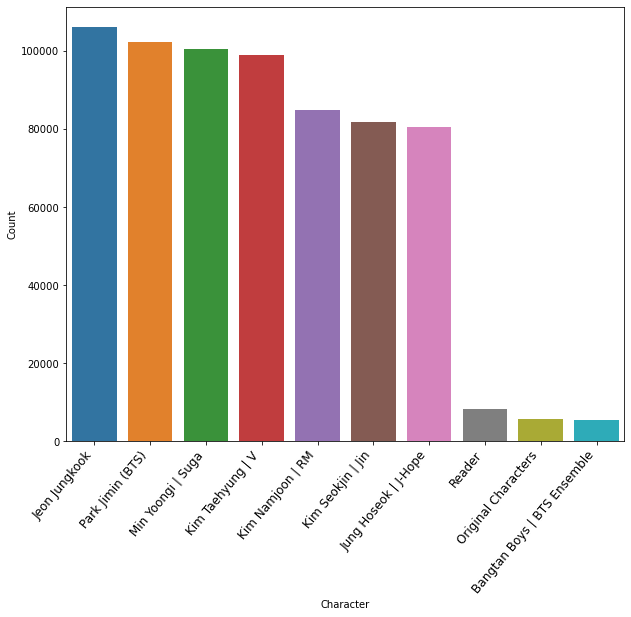

In [30]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''

bts = top_fandoms[top_fandoms["fandom"] == "BTS"]
bts_characters = bts["characters"].tolist()
temp = []
for i in range(len(bts_characters)):
    for key in list(bts_characters[i].keys()):
        temp.append({"Character": key, "Count": bts_characters[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(temp)
characters['Count'] = pd.to_numeric(characters['Count'])
# chars_nums = characters[["Count"]]
# characters[["Count"]] = (chars_nums-chars_nums.min())/(chars_nums.max()-chars_nums.min())
print(characters)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Character", y="Count", data=characters)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

                             Relationship  Count
0          Jeon Jungkook/Kim Taehyung | V  29702
1                Jeon Jungkook/Park Jimin  23279
2            Min Yoongi | Suga/Park Jimin  23097
3      Kim Namjoon | RM/Kim Seokjin | Jin  19764
4  Jung Hoseok | J-Hope/Min Yoongi | Suga  15232
5             Kim Taehyung | V/Park Jimin  12963
6         Jeon Jungkook/Min Yoongi | Suga  12047
7      Kim Taehyung | V/Min Yoongi | Suga   9166
8     Kim Seokjin | Jin/Min Yoongi | Suga   7636
9         Jeon Jungkook/Kim Seokjin | Jin   6172


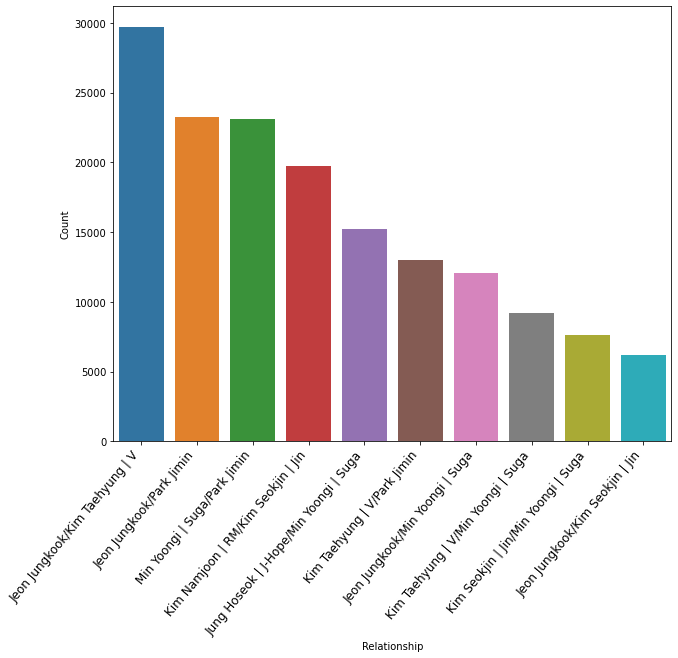

In [31]:
bts_ships = bts["relationships"].tolist()
temp = []
for i in range(len(bts_ships)):
    for key in list(bts_ships[i].keys()):
        temp.append({"Relationship": key, "Count": bts_ships[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
# ships_nums = ships[["Count"]]
# ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
print(ships)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

# Haikyuu!!

I personally just want to look at the HQ fandom.

Let's look at the characters first:

         Character  Count
0   Hinata Shouyou  34110
1     Oikawa Tooru  31993
2   Kuroo Tetsurou  31191
3   Kageyama Tobio  29441
4  Bokuto Koutarou  25702
5  Iwaizumi Hajime  24765
6   Tsukishima Kei  24241
7    Akaashi Keiji  22184
8  Sugawara Koushi  20672
9     Kozume Kenma  19821


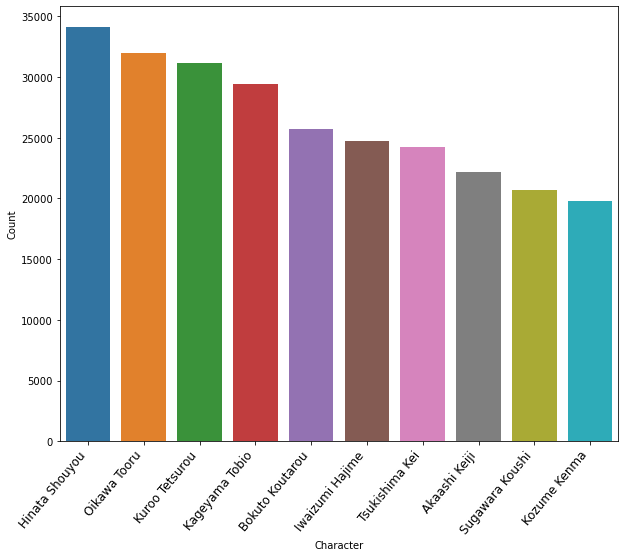

In [37]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''

hq = df[df["fandom"] == "Haikyuu!!"]
hq_characters = hq["characters"].tolist()
temp = []
for i in range(len(hq_characters)):
    for key in list(hq_characters[i].keys()):
        temp.append({"Character": key, "Count": hq_characters[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(temp)
characters['Count'] = pd.to_numeric(characters['Count'])
# chars_nums = characters[["Count"]]
# characters[["Count"]] = (chars_nums-chars_nums.min())/(chars_nums.max()-chars_nums.min())
print(characters)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Character", y="Count", data=characters)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

                        Relationship  Count
0       Iwaizumi Hajime/Oikawa Tooru  17267
1      Hinata Shouyou/Kageyama Tobio  15867
2      Akaashi Keiji/Bokuto Koutarou  13682
3    Sawamura Daichi/Sugawara Koushi   9093
4        Kozume Kenma/Kuroo Tetsurou   8964
5   Tsukishima Kei/Yamaguchi Tadashi   8364
6         Miya Atsumu/Sakusa Kiyoomi   7364
7      Kuroo Tetsurou/Tsukishima Kei   5361
8        Azumane Asahi/Nishinoya Yuu   4448
9  Hanamaki Takahiro/Matsukawa Issei   3182


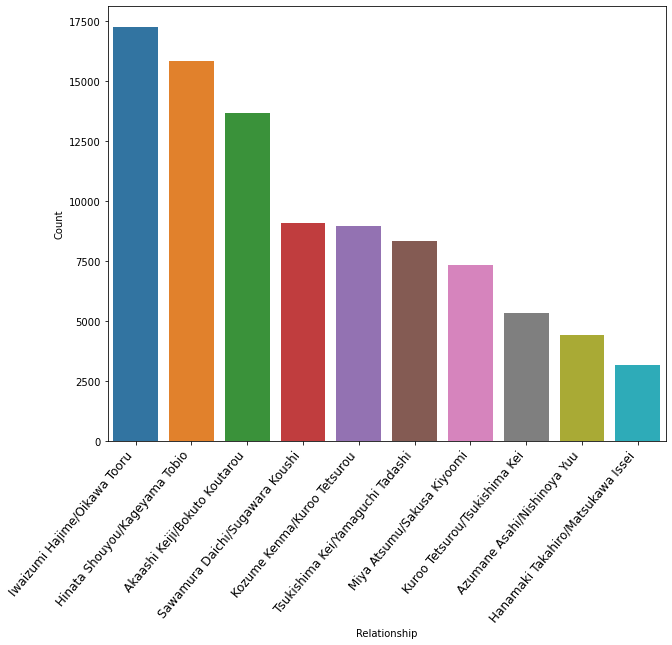

In [38]:
hq_ships = hq["relationships"].tolist()
temp = []
for i in range(len(hq_ships)):
    for key in list(hq_ships[i].keys()):
        temp.append({"Relationship": key, "Count": hq_ships[i][key]})

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
# ships_nums = ships[["Count"]]
# ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
print(ships)

plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()